## Add population data for each country??
## Add GDP data for each country??

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df

,Unnamed: 0,2016,2016.1,2016.2,2015,2015.1,2015.2,2014,2014.1,2014.2,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
0,NaN,"Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...",...,"Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great..."
1,NaN,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,...,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years
2,Country,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,...,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female
3,Afghanistan,5.5 [3.4-8.1],3.2 [1.3-6.4],7.6 [4.3-12.4],5.2 [3.3-7.7],3.0 [1.3-6.0],7.3 [4.1-11.8],4.9 [3.1-7.3],2.8 [1.2-5.6],7.0 [4.0-11.3],...,0.9 [0.3-2.2],0.6 [0.2-1.2],0.2 [0.0-0.7],0.9 [0.3-2.1],0.5 [0.2-1.1],0.2 [0.0-0.7],0.8 [0.2-2.0],0.5 [0.2-1.1],0.2 [0.0-0.6],0.8 [0.2-2.0]
4,Albania,21.7 [17.0-26.7],21.6 [14.8-29.0],21.8 [15.3-28.9],21.1 [16.6-26.0],20.9 [14.4-28.1],21.3 [15.1-28.1],20.5 [16.2-25.1],20.2 [13.9-27.3],20.8 [14.9-27.4],...,9.1 [4.6-15.5],6.8 [4.0-10.7],4.8 [2.0-9.3],8.9 [4.3-15.4],6.7 [3.8-10.6],4.6 [1.8-9.2],8.8 [4.1-15.4],6.5 [3.6-10.5],4.4 [1.7-9.2],8.6 [3.9-15.4]
5,Algeria,27.4 [22.5-32.7],19.9 [13.6-27.1],34.9 [27.6-42.7],26.7 [21.9-31.8],19.2 [13.2-26.1],34.2 [27.1-41.7],26.0 [21.4-30.9],18.5 [12.7-25.0],33.6 [26.7-40.7],...,11.8 [6.5-18.6],7.4 [4.3-11.3],3.1 [1.2-6.2],11.4 [6.2-18.4],7.2 [4.1-11.1],2.9 [1.1-6.1],11.1 [5.8-18.2],6.9 [3.9-10.9],2.8 [1.0-6.0],10.7 [5.5-18.0]
6,Andorra,25.6 [20.1-31.3],25.9 [18.0-34.3],25.3 [17.7-33.7],25.4 [20.1-31.0],25.5 [17.8-33.8],25.2 [17.7-33.4],25.2 [20.0-30.7],25.2 [17.6-33.3],25.1 [17.8-33.1],...,17.5 [10.9-25.3],14.0 [9.6-19.1],10.7 [5.6-17.4],16.9 [10.4-24.8],13.5 [9.1-18.6],10.2 [5.2-16.9],16.4 [9.8-24.4],12.9 [8.6-18.1],9.7 [4.7-16.3],15.8 [9.2-23.9]
7,Angola,8.2 [5.1-12.2],4.0 [1.6-7.9],12.1 [6.8-19.0],7.9 [4.9-11.7],3.8 [1.5-7.3],11.6 [6.5-18.2],7.5 [4.7-11.2],3.6 [1.4-6.9],11.1 [6.2-17.5],...,1.6 [0.5-3.7],0.9 [0.3-2.0],0.3 [0.0-0.9],1.5 [0.4-3.6],0.9 [0.3-2.0],0.3 [0.0-0.9],1.4 [0.4-3.5],0.8 [0.3-1.9],0.2 [0.0-0.8],1.4 [0.4-3.4]
8,Antigua and Barbuda,18.9 [13.8-24.6],11.6 [6.4-18.6],25.9 [17.6-35.2],18.4 [13.5-23.8],11.2 [6.2-17.8],25.3 [17.3-34.3],18.0 [13.2-23.1],10.8 [6.1-17.1],24.8 [17.1-33.5],...,9.6 [5.0-16.1],6.0 [3.4-9.5],2.5 [0.9-5.4],9.3 [4.7-15.9],5.8 [3.2-9.3],2.4 [0.8-5.3],9.1 [4.4-15.7],5.6 [3.0-9.1],2.3 [0.8-5.1],8.8 [4.1-15.6]
9,Argentina,28.3 [23.4-33.5],27.3 [20.5-35.0],29.0 [22.5-36.0],27.8 [23.2-32.7],26.8 [20.2-34.1],28.5 [22.3-35.1],27.3 [22.9-32.0],26.2 [20.0-33.1],28.1 [22.1-34.4],...,14.1 [9.0-20.5],11.8 [8.2-16.0],9.6 [5.2-15.4],13.8 [8.6-20.3],11.5 [7.8-15.8],9.3 [4.9-15.3],13.5 [8.1-20.2],11.2 [7.5-15.7],9.0 [4.6-15.2],13.2 [7.7-20.1]


In [5]:
df[df['2016'] == 'No data']

,Unnamed: 0,2016,2016.1,2016.2,2015,2015.1,2015.2,2014,2014.1,2014.2,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
115,Monaco,No data,No data,No data,No data,No data,No data,No data,No data,No data,...,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data
152,San Marino,No data,No data,No data,No data,No data,No data,No data,No data,No data,...,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data
165,South Sudan,No data,No data,No data,No data,No data,No data,No data,No data,No data,...,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data
168,Sudan,No data,No data,No data,No data,No data,No data,No data,No data,No data,...,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data


In [6]:
df.rename(columns = {'Unnamed: 0': 'Country'}, inplace = True)
df.dropna(inplace = True)
df.drop([2], inplace = True)

In [7]:
df.set_index('Country', inplace = True)

In [8]:
df.drop(['Monaco', 'San Marino', 'South Sudan', 'Sudan'], inplace = True)

In [9]:
df['2016'].value_counts()

20.2 [15.4-25.4]    2
23.1 [19.3-27.1]    2
5.3 [3.5-7.6]       2
5.8 [4.1-7.9]       1
8.6 [6.2-11.5]      1
15.5 [12.0-19.2]    1
35.1 [29.3-41.2]    1
23.1 [18.3-28.4]    1
20.2 [15.3-25.6]    1
21.5 [17.4-25.9]    1
20.1 [15.9-24.6]    1
13.5 [9.5-18.3]     1
7.7 [5.4-10.4]      1
19.9 [15.4-25.0]    1
26.1 [21.4-31.1]    1
22.6 [18.0-27.6]    1
31.7 [26.2-37.4]    1
21.3 [15.6-27.5]    1
3.9 [3.0-5.0]       1
11.4 [8.6-14.5]     1
6.4 [4.3-9.0]       1
18.6 [14.2-23.6]    1
22.1 [18.7-25.7]    1
8.9 [6.8-11.2]      1
26.0 [21.3-31.1]    1
12.4 [9.1-16.3]     1
21.7 [17.2-26.7]    1
23.8 [20.2-27.4]    1
36.2 [32.3-40.1]    1
8.4 [6.3-11.0]      1
                   ..
8.0 [5.0-11.6]      1
25.6 [20.1-31.3]    1
8.6 [6.1-11.8]      1
12.7 [9.3-16.5]     1
26.4 [21.5-31.7]    1
15.0 [10.6-20.1]    1
10.3 [7.6-13.4]     1
30.4 [25.5-35.5]    1
9.5 [6.6-13.0]      1
5.4 [3.5-7.9]       1
22.3 [18.5-26.5]    1
4.3 [3.2-5.5]       1
26.4 [21.2-31.8]    1
25.0 [19.7-30.5]    1
51.6 [45.0

In [10]:
columns = df.columns

In [11]:
columns = columns.tolist()

In [12]:
m_cols = ['Country']
for i in range(0,len(columns)):
    if '.1' in columns[i]:
        m_cols.append(columns[i])

In [13]:
m_cols[0:5]

['Country', '2016.1', '2015.1', '2014.1', '2013.1']

In [14]:
f_cols = ['Country']
for i in range(0,len(columns)):
    if '.2' in columns[i]:
        f_cols.append(columns[i])

In [15]:
f_cols[0:5]

['Country', '2016.2', '2015.2', '2014.2', '2013.2']

In [16]:
print(df.columns.intersection(m_cols))

Index(['2016.1', '2015.1', '2014.1', '2013.1', '2012.1', '2011.1', '2010.1',
       '2009.1', '2008.1', '2007.1', '2006.1', '2005.1', '2004.1', '2003.1',
       '2002.1', '2001.1', '2000.1', '1999.1', '1998.1', '1997.1', '1996.1',
       '1995.1', '1994.1', '1993.1', '1992.1', '1991.1', '1990.1', '1989.1',
       '1988.1', '1987.1', '1986.1', '1985.1', '1984.1', '1983.1', '1982.1',
       '1981.1', '1980.1', '1979.1', '1978.1', '1977.1', '1976.1', '1975.1'],
      dtype='object')


In [17]:
m_df = df[np.intersect1d(df.columns, m_cols)]

In [18]:
m_df

,1975.1,1976.1,1977.1,1978.1,1979.1,1980.1,1981.1,1982.1,1983.1,1984.1,...,2007.1,2008.1,2009.1,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.2 [0.0-0.6],0.2 [0.0-0.7],0.2 [0.0-0.7],0.2 [0.1-0.7],0.3 [0.1-0.8],0.3 [0.1-0.8],0.3 [0.1-0.8],0.3 [0.1-0.9],0.4 [0.1-0.9],0.4 [0.1-1.0],...,1.8 [0.8-3.7],2.0 [0.8-3.9],2.1 [0.9-4.2],2.2 [1.0-4.4],2.4 [1.0-4.7],2.5 [1.1-5.0],2.7 [1.1-5.3],2.8 [1.2-5.6],3.0 [1.3-6.0],3.2 [1.3-6.4]
Albania,4.4 [1.7-9.2],4.6 [1.8-9.2],4.8 [2.0-9.3],5.0 [2.1-9.4],5.2 [2.3-9.6],5.4 [2.4-9.7],5.6 [2.6-9.9],5.8 [2.8-10.1],6.0 [2.9-10.4],6.3 [3.1-10.7],...,15.5 [10.4-21.2],16.1 [10.9-22.1],16.8 [11.5-22.9],17.4 [12.0-23.7],18.1 [12.5-24.5],18.8 [13.0-25.4],19.5 [13.4-26.3],20.2 [13.9-27.3],20.9 [14.4-28.1],21.6 [14.8-29.0]
Algeria,2.8 [1.0-6.0],2.9 [1.1-6.1],3.1 [1.2-6.2],3.2 [1.3-6.4],3.4 [1.4-6.6],3.6 [1.6-6.7],3.8 [1.7-7.0],4.0 [1.9-7.2],4.3 [2.0-7.5],4.5 [2.2-7.8],...,14.0 [9.5-19.1],14.6 [10.0-19.8],15.2 [10.5-20.5],15.8 [11.0-21.4],16.5 [11.4-22.3],17.1 [11.9-23.2],17.8 [12.3-24.1],18.5 [12.7-25.0],19.2 [13.2-26.1],19.9 [13.6-27.1]
Andorra,9.7 [4.7-16.3],10.2 [5.2-16.9],10.7 [5.6-17.4],11.2 [6.0-18.0],11.8 [6.4-18.4],12.3 [6.9-18.9],12.8 [7.3-19.4],13.3 [7.8-20.0],13.8 [8.1-20.5],14.3 [8.5-21.0],...,22.9 [16.3-30.1],23.3 [16.6-30.4],23.6 [16.8-30.9],23.9 [17.0-31.3],24.2 [17.3-31.8],24.5 [17.4-32.3],24.8 [17.5-32.7],25.2 [17.6-33.3],25.5 [17.8-33.8],25.9 [18.0-34.3]
Angola,0.2 [0.0-0.8],0.3 [0.0-0.9],0.3 [0.0-0.9],0.3 [0.1-0.9],0.3 [0.1-1.0],0.3 [0.1-1.0],0.4 [0.1-1.0],0.4 [0.1-1.1],0.4 [0.1-1.2],0.5 [0.1-1.2],...,2.3 [0.9-4.5],2.4 [0.9-4.8],2.6 [1.0-5.1],2.8 [1.1-5.4],2.9 [1.1-5.8],3.1 [1.2-6.1],3.3 [1.3-6.4],3.6 [1.4-6.9],3.8 [1.5-7.3],4.0 [1.6-7.9]
Antigua and Barbuda,2.3 [0.8-5.1],2.4 [0.8-5.3],2.5 [0.9-5.4],2.6 [1.0-5.5],2.8 [1.1-5.7],2.9 [1.2-5.8],3.0 [1.3-6.0],3.2 [1.4-6.2],3.3 [1.5-6.4],3.5 [1.6-6.6],...,8.6 [4.9-13.4],8.9 [5.1-13.8],9.2 [5.3-14.2],9.5 [5.4-14.8],9.8 [5.6-15.3],10.1 [5.8-15.8],10.5 [5.9-16.4],10.8 [6.1-17.1],11.2 [6.2-17.8],11.6 [6.4-18.6]
Argentina,9.0 [4.6-15.2],9.3 [4.9-15.3],9.6 [5.2-15.4],9.9 [5.6-15.6],10.3 [5.9-15.9],10.6 [6.3-16.1],11.0 [6.6-16.5],11.3 [7.0-16.8],11.7 [7.3-17.2],12.1 [7.7-17.5],...,22.5 [17.5-28.2],23.0 [17.9-28.8],23.6 [18.3-29.4],24.1 [18.7-30.1],24.6 [19.1-30.7],25.1 [19.4-31.5],25.7 [19.7-32.3],26.2 [20.0-33.1],26.8 [20.2-34.1],27.3 [20.5-35.0]
Armenia,4.5 [1.7-8.9],4.7 [1.8-9.1],4.9 [2.0-9.3],5.2 [2.2-9.6],5.4 [2.3-9.8],5.7 [2.5-10.1],5.9 [2.7-10.4],6.2 [2.9-10.7],6.4 [3.1-11.0],6.7 [3.3-11.3],...,13.2 [8.4-18.8],13.6 [8.7-19.3],14.0 [9.1-19.8],14.4 [9.4-20.3],14.8 [9.7-20.8],15.2 [10.0-21.5],15.7 [10.3-22.1],16.1 [10.6-22.7],16.6 [10.9-23.3],17.1 [11.1-24.0]
Australia,9.7 [6.2-13.9],10.0 [6.6-14.0],10.3 [7.0-14.1],10.6 [7.3-14.2],10.8 [7.7-14.4],11.2 [8.0-14.6],11.5 [8.3-14.8],11.8 [8.7-15.1],12.1 [9.0-15.3],12.4 [9.4-15.6],...,24.0 [20.4-27.8],24.6 [20.9-28.5],25.2 [21.4-29.2],25.8 [21.9-30.0],26.4 [22.4-30.7],27.0 [22.8-31.6],27.7 [23.2-32.5],28.3 [23.6-33.4],28.9 [23.9-34.3],29.6 [24.2-35.3]


In [19]:
f_df = df[np.intersect1d(df.columns, f_cols)]
f_df

,1975.2,1976.2,1977.2,1978.2,1979.2,1980.2,1981.2,1982.2,1983.2,1984.2,...,2007.2,2008.2,2009.2,2010.2,2011.2,2012.2,2013.2,2014.2,2015.2,2016.2
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.8 [0.2-2.0],0.8 [0.2-2.0],0.9 [0.3-2.1],0.9 [0.3-2.2],1.0 [0.3-2.3],1.1 [0.4-2.4],1.1 [0.4-2.5],1.2 [0.4-2.6],1.3 [0.5-2.7],1.4 [0.5-2.9],...,4.9 [2.8-8.0],5.2 [2.9-8.4],5.4 [3.1-8.8],5.7 [3.3-9.2],6.0 [3.4-9.7],6.3 [3.6-10.2],6.6 [3.8-10.7],7.0 [4.0-11.3],7.3 [4.1-11.8],7.6 [4.3-12.4]
Albania,8.6 [3.9-15.4],8.8 [4.1-15.4],8.9 [4.3-15.4],9.1 [4.6-15.5],9.3 [4.8-15.5],9.5 [5.0-15.5],9.7 [5.3-15.7],9.9 [5.5-15.8],10.1 [5.7-15.9],10.3 [6.0-16.1],...,17.5 [12.6-23.0],18.0 [12.9-23.6],18.4 [13.3-24.2],18.9 [13.6-24.8],19.4 [14.0-25.3],19.9 [14.3-26.0],20.4 [14.6-26.7],20.8 [14.9-27.4],21.3 [15.1-28.1],21.8 [15.3-28.9]
Algeria,10.7 [5.5-18.0],11.1 [5.8-18.2],11.4 [6.2-18.4],11.8 [6.5-18.6],12.2 [6.9-18.9],12.7 [7.3-19.3],13.1 [7.8-19.7],13.6 [8.2-20.1],14.1 [8.8-20.5],14.6 [9.3-21.0],...,28.8 [23.1-34.8],29.5 [23.7-35.6],30.2 [24.3-36.4],30.9 [24.9-37.3],31.5 [25.4-38.2],32.2 [25.9-39.0],32.9 [26.4-39.8],33.6 [26.7-40.7],34.2 [27.1-41.7],34.9 [27.6-42.7]
Andorra,15.8 [9.2-23.9],16.4 [9.8-24.4],16.9 [10.4-24.8],17.5 [10.9-25.3],18.0 [11.4-25.7],18.5 [11.9-26.1],18.9 [12.4-26.5],19.4 [12.9-27.0],19.8 [13.3-27.2],20.2 [13.7-27.6],...,24.5 [18.0-31.6],24.6 [18.0-31.7],24.7 [18.0-31.8],24.8 [18.0-32.1],24.9 [17.9-32.3],25.0 [17.9-32.5],25.1 [17.8-32.8],25.1 [17.8-33.1],25.2 [17.7-33.4],25.3 [17.7-33.7]
Angola,1.4 [0.4-3.4],1.4 [0.4-3.5],1.5 [0.4-3.6],1.6 [0.5-3.7],1.7 [0.5-3.8],1.8 [0.6-4.0],1.9 [0.7-4.1],2.0 [0.7-4.3],2.2 [0.8-4.5],2.3 [0.9-4.7],...,8.0 [4.4-12.9],8.4 [4.7-13.5],8.8 [4.9-14.1],9.3 [5.2-14.7],9.7 [5.5-15.4],10.2 [5.7-16.0],10.6 [6.0-16.7],11.1 [6.2-17.5],11.6 [6.5-18.2],12.1 [6.8-19.0]
Antigua and Barbuda,8.8 [4.1-15.6],9.1 [4.4-15.7],9.3 [4.7-15.9],9.6 [5.0-16.1],9.9 [5.2-16.3],10.3 [5.5-16.6],10.6 [5.8-16.8],10.9 [6.1-17.1],11.3 [6.4-17.3],11.6 [6.7-17.7],...,21.3 [14.8-28.5],21.7 [15.2-29.1],22.2 [15.5-29.7],22.7 [15.8-30.4],23.2 [16.1-31.1],23.7 [16.4-31.8],24.2 [16.7-32.6],24.8 [17.1-33.5],25.3 [17.3-34.3],25.9 [17.6-35.2]
Argentina,13.2 [7.7-20.1],13.5 [8.1-20.2],13.8 [8.6-20.3],14.1 [9.0-20.5],14.4 [9.4-20.6],14.7 [9.8-20.8],15.1 [10.2-21.0],15.4 [10.5-21.3],15.7 [10.9-21.5],16.1 [11.3-21.8],...,25.0 [20.2-30.2],25.4 [20.6-30.7],25.9 [21.0-31.2],26.3 [21.3-31.8],26.7 [21.5-32.4],27.2 [21.8-33.0],27.6 [22.0-33.7],28.1 [22.1-34.4],28.5 [22.3-35.1],29.0 [22.5-36.0]
Armenia,9.5 [4.7-16.2],9.8 [5.0-16.5],10.2 [5.3-16.7],10.5 [5.7-16.9],10.8 [6.0-17.2],11.1 [6.3-17.4],11.5 [6.6-17.7],11.8 [6.9-17.9],12.1 [7.2-18.0],12.4 [7.6-18.3],...,19.1 [14.1-24.7],19.5 [14.4-25.1],19.9 [14.7-25.6],20.4 [15.0-26.1],20.8 [15.4-26.6],21.2 [15.7-27.2],21.7 [16.0-27.8],22.1 [16.1-28.3],22.6 [16.4-29.1],23.0 [16.6-29.9]
Australia,11.2 [7.6-15.2],11.5 [8.0-15.4],11.7 [8.3-15.6],12.0 [8.7-15.7],12.3 [9.0-15.8],12.6 [9.4-16.0],12.8 [9.8-16.2],13.1 [10.1-16.5],13.4 [10.4-16.7],13.7 [10.8-16.9],...,24.0 [20.6-27.6],24.5 [21.0-28.2],24.9 [21.4-28.8],25.4 [21.7-29.5],25.9 [22.0-30.1],26.4 [22.3-30.7],26.9 [22.5-31.5],27.4 [22.8-32.2],27.9 [23.0-33.1],28.4 [23.1-33.9]


In [20]:
#val = df['2016.2']

In [21]:
#for i in range(0,len(val.values)):
    #val.values[i] = val.values[i][:4]
    #val.values[i] = float(val.values[i].strip('['))

In [22]:
def toFloat(col,gender):
    if gender == 'm':
        col = m_df[col]
    else:
        col = f_df[col]
    #print(col.values)
    for i in range(0,len(col.values)):
        col.values[i] = col.values[i][:5]
        col.values[i] = float(col.values[i].strip('['))

In [23]:
#val[:5]

In [24]:
m_cols = m_df.columns.tolist()

In [25]:
#toFloat('2015.1')

In [26]:
m_df['2015.1'][:5]

Country
Afghanistan       3.0 [1.3-6.0]
Albania        20.9 [14.4-28.1]
Algeria        19.2 [13.2-26.1]
Andorra        25.5 [17.8-33.8]
Angola            3.8 [1.5-7.3]
Name: 2015.1, dtype: object

In [27]:
for m_col in m_cols:
    toFloat(m_col,'m')

In [28]:
m_df

,1975.1,1976.1,1977.1,1978.1,1979.1,1980.1,1981.1,1982.1,1983.1,1984.1,...,2007.1,2008.1,2009.1,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.4,0.4,...,1.8,2,2.1,2.2,2.4,2.5,2.7,2.8,3,3.2
Albania,4.4,4.6,4.8,5,5.2,5.4,5.6,5.8,6,6.3,...,15.5,16.1,16.8,17.4,18.1,18.8,19.5,20.2,20.9,21.6
Algeria,2.8,2.9,3.1,3.2,3.4,3.6,3.8,4,4.3,4.5,...,14,14.6,15.2,15.8,16.5,17.1,17.8,18.5,19.2,19.9
Andorra,9.7,10.2,10.7,11.2,11.8,12.3,12.8,13.3,13.8,14.3,...,22.9,23.3,23.6,23.9,24.2,24.5,24.8,25.2,25.5,25.9
Angola,0.2,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.5,...,2.3,2.4,2.6,2.8,2.9,3.1,3.3,3.6,3.8,4
Antigua and Barbuda,2.3,2.4,2.5,2.6,2.8,2.9,3,3.2,3.3,3.5,...,8.6,8.9,9.2,9.5,9.8,10.1,10.5,10.8,11.2,11.6
Argentina,9,9.3,9.6,9.9,10.3,10.6,11,11.3,11.7,12.1,...,22.5,23,23.6,24.1,24.6,25.1,25.7,26.2,26.8,27.3
Armenia,4.5,4.7,4.9,5.2,5.4,5.7,5.9,6.2,6.4,6.7,...,13.2,13.6,14,14.4,14.8,15.2,15.7,16.1,16.6,17.1
Australia,9.7,10,10.3,10.6,10.8,11.2,11.5,11.8,12.1,12.4,...,24,24.6,25.2,25.8,26.4,27,27.7,28.3,28.9,29.6


In [29]:
f_cols = f_df.columns.tolist()

In [30]:
for f_col in f_cols:
    toFloat(f_col,'f')

In [31]:
f_df

,1975.2,1976.2,1977.2,1978.2,1979.2,1980.2,1981.2,1982.2,1983.2,1984.2,...,2007.2,2008.2,2009.2,2010.2,2011.2,2012.2,2013.2,2014.2,2015.2,2016.2
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.8,0.8,0.9,0.9,1,1.1,1.1,1.2,1.3,1.4,...,4.9,5.2,5.4,5.7,6,6.3,6.6,7,7.3,7.6
Albania,8.6,8.8,8.9,9.1,9.3,9.5,9.7,9.9,10.1,10.3,...,17.5,18,18.4,18.9,19.4,19.9,20.4,20.8,21.3,21.8
Algeria,10.7,11.1,11.4,11.8,12.2,12.7,13.1,13.6,14.1,14.6,...,28.8,29.5,30.2,30.9,31.5,32.2,32.9,33.6,34.2,34.9
Andorra,15.8,16.4,16.9,17.5,18,18.5,18.9,19.4,19.8,20.2,...,24.5,24.6,24.7,24.8,24.9,25,25.1,25.1,25.2,25.3
Angola,1.4,1.4,1.5,1.6,1.7,1.8,1.9,2,2.2,2.3,...,8,8.4,8.8,9.3,9.7,10.2,10.6,11.1,11.6,12.1
Antigua and Barbuda,8.8,9.1,9.3,9.6,9.9,10.3,10.6,10.9,11.3,11.6,...,21.3,21.7,22.2,22.7,23.2,23.7,24.2,24.8,25.3,25.9
Argentina,13.2,13.5,13.8,14.1,14.4,14.7,15.1,15.4,15.7,16.1,...,25,25.4,25.9,26.3,26.7,27.2,27.6,28.1,28.5,29
Armenia,9.5,9.8,10.2,10.5,10.8,11.1,11.5,11.8,12.1,12.4,...,19.1,19.5,19.9,20.4,20.8,21.2,21.7,22.1,22.6,23
Australia,11.2,11.5,11.7,12,12.3,12.6,12.8,13.1,13.4,13.7,...,24,24.5,24.9,25.4,25.9,26.4,26.9,27.4,27.9,28.4


## Global plotly choropleth map??

In [32]:
data = dict(type = 'choropleth',
    locationmode = "country names",
    locations = f_df.index,
    z =f_df['2016.2'],
    #text = new_df['Total_Cases'],
    colorscale = 'spectral',
    autocolorscale=False,
    reversescale=False,
    colorbar_title = 'Obesity',
)

In [54]:
layout = dict(
    title = '2016 obesity female',
    geo = dict(
        showframe = False,
        projection = {'type':'mercator'}
    )
)

In [55]:
colors = ["#F9F9F5", "#FAFAE6", "#FCFCCB", "#FCFCAE",  "#FCF1AE", "#FCEA7D", "#FCD97D",
          "#FCCE7D", "#FCC07D", "#FEB562", "#F9A648",  "#F98E48", "#FD8739", "#FE7519",
          "#FE5E19", "#FA520A", "#FA2B0A", "#9B1803",  "#861604", "#651104", "#570303",]

In [56]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

In [36]:
np.mean(f_df.loc['Spain'])

17.63571428571429

In [37]:
f_df.loc['Spain'].index

Index(['1975.2', '1976.2', '1977.2', '1978.2', '1979.2', '1980.2', '1981.2',
       '1982.2', '1983.2', '1984.2', '1985.2', '1986.2', '1987.2', '1988.2',
       '1989.2', '1990.2', '1991.2', '1992.2', '1993.2', '1994.2', '1995.2',
       '1996.2', '1997.2', '1998.2', '1999.2', '2000.2', '2001.2', '2002.2',
       '2003.2', '2004.2', '2005.2', '2006.2', '2007.2', '2008.2', '2009.2',
       '2010.2', '2011.2', '2012.2', '2013.2', '2014.2', '2015.2', '2016.2'],
      dtype='object')

In [38]:
f_df.loc['Spain'].values

array([11.5, 11.8, 12.2, 12.5, 12.9, 13.2, 13.6, 13.9, 14.2, 14.6, 14.9,
       15.2, 15.5, 15.8, 16.1, 16.4, 16.7, 17.0, 17.2, 17.5, 17.8, 18.1,
       18.3, 18.6, 18.8, 19.1, 19.3, 19.6, 19.8, 20.1, 20.3, 20.5, 20.8,
       21.0, 21.2, 21.4, 21.7, 21.9, 22.1, 22.3, 22.5, 22.8], dtype=object)

In [39]:
f_df_t = f_df.transpose()

In [40]:
f_df_t.head()

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
1975.2,0.8,8.6,10.7,15.8,1.4,8.8,13.2,9.5,11.2,7.8,...,1.4,13.3,14.6,5.6,8.1,13.2,0.2,4.2,2.5,6.7
1976.2,0.8,8.8,11.1,16.4,1.4,9.1,13.5,9.8,11.5,7.9,...,1.5,13.6,14.9,5.8,8.4,13.6,0.2,4.3,2.7,7
1977.2,0.9,8.9,11.4,16.9,1.5,9.3,13.8,10.2,11.7,8.1,...,1.6,14,15.2,6,8.7,14,0.2,4.5,2.9,7.4
1978.2,0.9,9.1,11.8,17.5,1.6,9.6,14.1,10.5,12,8.2,...,1.7,14.4,15.5,6.2,9.1,14.4,0.2,4.8,3,7.7
1979.2,1,9.3,12.2,18,1.7,9.9,14.4,10.8,12.3,8.4,...,1.8,14.8,15.8,6.5,9.5,14.8,0.3,5,3.2,8.1


In [41]:
x = list(f_df_t['Spain'].index)

In [42]:
y = list(f_df_t['Spain'].values)

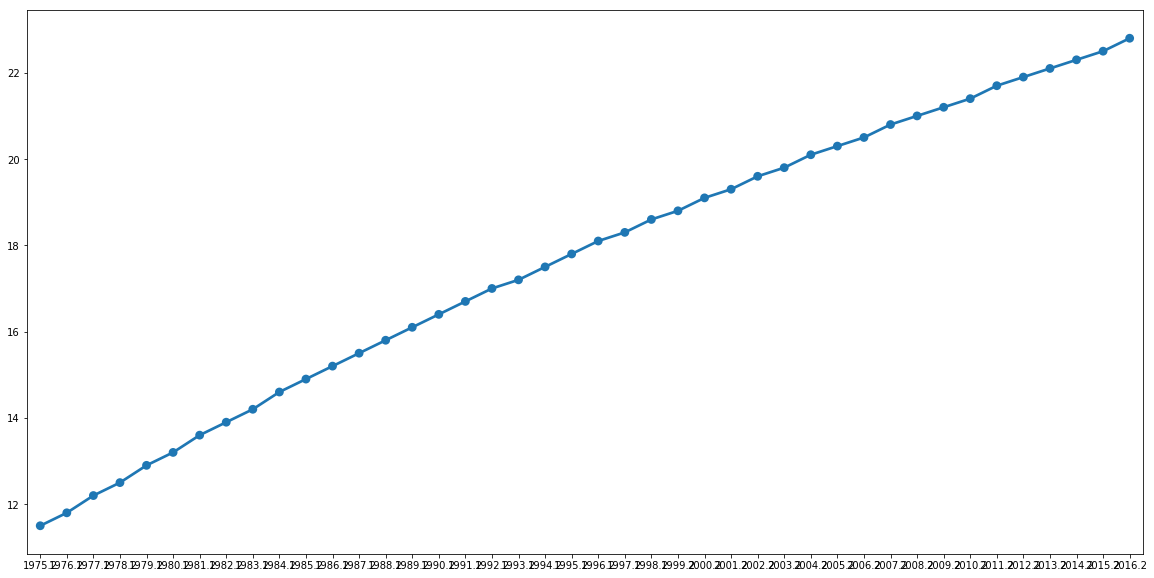

In [43]:
plt.figure(figsize=(20,10))
sns.pointplot(x = x, y = y, height = 10)

In [44]:
for i in range(0,len(x)):
    x[i] = int(str(x[i])[:4])

In [45]:
from scipy.stats import linregress

In [46]:
linregress(x,y).slope

0.2723199092456041

In [47]:
f_df_t['Year'] = x

In [48]:
f_df_t.set_index('Year').head()

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1975,0.8,8.6,10.7,15.8,1.4,8.8,13.2,9.5,11.2,7.8,...,1.4,13.3,14.6,5.6,8.1,13.2,0.2,4.2,2.5,6.7
1976,0.8,8.8,11.1,16.4,1.4,9.1,13.5,9.8,11.5,7.9,...,1.5,13.6,14.9,5.8,8.4,13.6,0.2,4.3,2.7,7
1977,0.9,8.9,11.4,16.9,1.5,9.3,13.8,10.2,11.7,8.1,...,1.6,14,15.2,6,8.7,14,0.2,4.5,2.9,7.4
1978,0.9,9.1,11.8,17.5,1.6,9.6,14.1,10.5,12,8.2,...,1.7,14.4,15.5,6.2,9.1,14.4,0.2,4.8,3,7.7
1979,1,9.3,12.2,18,1.7,9.9,14.4,10.8,12.3,8.4,...,1.8,14.8,15.8,6.5,9.5,14.8,0.3,5,3.2,8.1


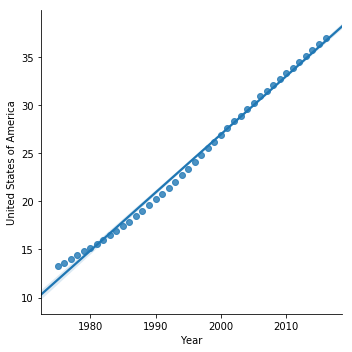

In [49]:
sns.lmplot(x = 'Year', y = 'United States of America', data = f_df_t)

In [50]:
f_df_t['Spain']

1975.2    11.5
1976.2    11.8
1977.2    12.2
1978.2    12.5
1979.2    12.9
1980.2    13.2
1981.2    13.6
1982.2    13.9
1983.2    14.2
1984.2    14.6
1985.2    14.9
1986.2    15.2
1987.2    15.5
1988.2    15.8
1989.2    16.1
1990.2    16.4
1991.2    16.7
1992.2      17
1993.2    17.2
1994.2    17.5
1995.2    17.8
1996.2    18.1
1997.2    18.3
1998.2    18.6
1999.2    18.8
2000.2    19.1
2001.2    19.3
2002.2    19.6
2003.2    19.8
2004.2    20.1
2005.2    20.3
2006.2    20.5
2007.2    20.8
2008.2      21
2009.2    21.2
2010.2    21.4
2011.2    21.7
2012.2    21.9
2013.2    22.1
2014.2    22.3
2015.2    22.5
2016.2    22.8
Name: Spain, dtype: object

In [58]:
import requests
from bs4 import BeautifulSoup
# Read in wikipedia table with US City populations
website_text = requests.get('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita#cite_note-GDP_IMF-4').text
soup = BeautifulSoup(website_text,'xml')

# Find wikitable
table = soup.find('table',{'class':'wikitable sortable'})
table_rows = table.find_all('tr')

# Read in wikitable row by row
gdp_data = []
for row in table_rows:
    gdp_data.append([t.text.strip() for t in row.find_all('td')])

In [69]:
gdp_df = pd.DataFrame(gdp_data,columns = ['Rank', 'Country','GDP Per Capita'])
gdp_df = gdp_df[~gdp_df.isnull()] # remove null rows

In [72]:
gdp_df.head()

,Rank,Country,GDP Per Capita
0,NaN,NaN,NaN
1,1,Luxembourg,"113,196 [a]"
2,2,Switzerland,"83,716"
3,—,Macau,"81,151"
4,3,Norway,"77,975"


In [73]:
gdp_df.drop(0,inplace = True)
gdp_df.head()

,Rank,Country,GDP Per Capita
1,1,Luxembourg,"113,196 [a]"
2,2,Switzerland,"83,716"
3,—,Macau,"81,151"
4,3,Norway,"77,975"
5,4,Ireland,"77,771"


In [74]:
len(gdp_df['Country'])

193

In [76]:
len(m_df.index)

191